<a href="https://colab.research.google.com/github/egy1st/denmune-clustering-algorithm/blob/main/characteristics/outlier_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import time
import os.path
import requests
from numpy import genfromtxt
import matplotlib.pyplot as plt
!mkdir data #let us create data folder to hold our data

mkdir: cannot create directory ‘data’: File exists


In [ ]:
# install DenMune clustering algorithm using pip command from the offecial Python repository, PyPi
# from https://pypi.org/project/denmune/
!pip install denmune

# now import it
from denmune import DenMune

In [40]:
dataset = 'chars' # let us take Optical Characters dataset as an example

url = "https://zerobytes.one/denmune_data/"
file_ext = ".txt"
ground_ext = "-gt"


dataset_url = url + dataset + file_ext
groundtruth_url = url + dataset + ground_ext  + file_ext

data_path = 'data/' # change it to whatever you put your data, set it to ''; so it will retrive from current folder
data_file = data_path + dataset + file_ext #  i.e. 'iris' + '.txt' ==> iris.txt

data_path = 'data/' # change it to whatever you put your data, set it to ''; so it will retrive from current folder
if  not os.path.isfile(data_path + dataset + file_ext):
    req = requests.get(dataset_url)
    with open(data_path + dataset + file_ext, 'wb') as f:
        f.write(req.content)
data = genfromtxt(data_file , delimiter='\t') 

if  not os.path.isfile(data_path + dataset + ground_ext + file_ext):
    req = requests.get(groundtruth_url)
    with open(data_path + dataset +  ground_ext + file_ext, 'wb') as f:
        f.write(req.content)    
data_labels =  genfromtxt(groundtruth_url , delimiter='\t') #  i.e. 'iris' + + '-gt + '.txt' ==> iris-gt.txt 

data2d_ext = '-2d'
file_2d =  data_path + dataset + data2d_ext + file_ext # 'iris' + '-2d' + '.txt' ==> iris-2d.txt

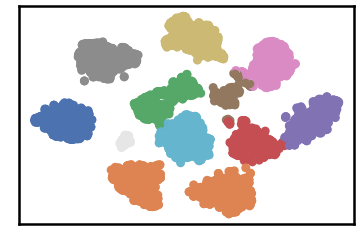

k= 149 F1 score is: 0.9377103253486169 , Noise of type-1 0 , Noise of type-2 56


In [137]:
# Denmune's Paramaters
verpose_mode = False # view in-depth analysis of time complexity and outlier detection, num of clusters
show_plot = True  # show plots on/off
show_noise = True # show noise and outlier on/off

noise_type1 = []
noise_type2 = []
validity_score = []
validity_key = "F1" # Acc=1, F1-score=2,  NMI=3, AMI=4, ARI=5,  Homogeneity=6, and Completeness=7   

from IPython.display import clear_output
for knn in range (1, 150):
  clear_output(wait=True)
  dm = DenMune(data=data,file_2d=file_2d, k_nearest=knn, verpose=verpose_mode, show_noise=show_noise, rgn_tsne=False)
  labels_pred = dm.fit_predict()
  validity = dm.validate_Clusters(labels_true=data_labels, labels_pred=labels_pred)
  dm.plot_clusters(labels=labels_pred, show_noise=show_noise) # noise and outlier 

  ns_type1= dm.analyzer['n_points']['noise']['type-1']
  ns_type2= dm.analyzer['n_points']['noise']['type-2']
  noise_type1.append([knn, ns_type1])
  noise_type2.append([knn, ns_type2])
  validity_score.append([knn, validity[validity_key]])  
  print ('k=' , knn, validity_key , 'score is:', validity[validity_key], ', Noise of type-1', ns_type1, ', Noise of type-2', ns_type2)
      

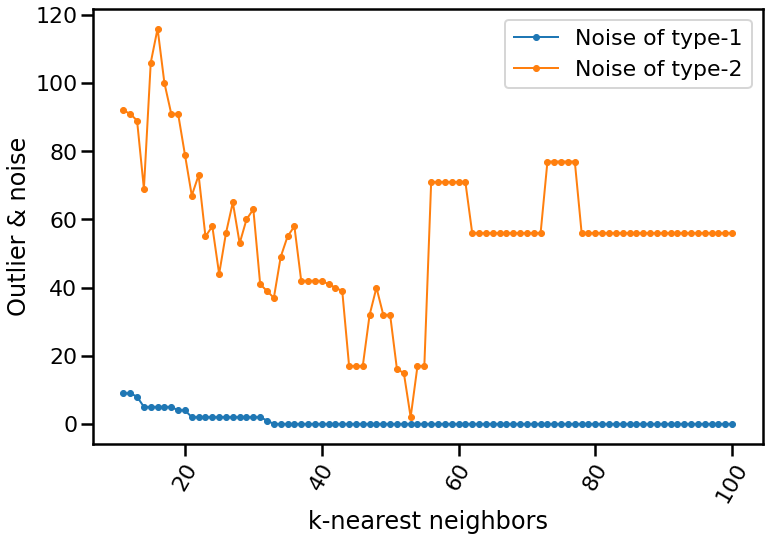

In [139]:
start = 10
end = 100
x, y1 = zip(*noise_type1[start:end])
x, y2 = zip(*noise_type2[start:end])
# Creating figure and axis objects using subplots()
fig, ax = plt.subplots(figsize=[12, 8])
ax.plot(x, y1, marker='.', linewidth=2, label='Noise of type-1')
ax.plot(x, y2, marker='.', linewidth=2, label='Noise of type-2')
plt.xticks(rotation=60)
ax.set_xlabel('k-nearest neighbors')
ax.set_ylabel('Outlier & noise')
plt.legend()
plt.show()

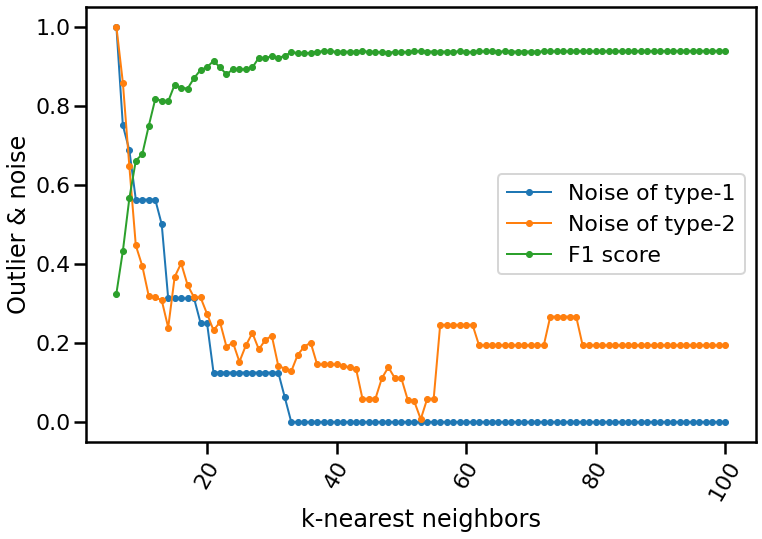

In [141]:
noise_type1_per = noise_type1
start = 5
end = 100
min_ns1 = max(noise_type1[start:end],key=itemgetter(1))[1]
max_ns1 = max(noise_type1[start:end],key=itemgetter(1))[1]
min_ns2 = max(noise_type2[start:end],key=itemgetter(1))[1]
max_ns2 = max(noise_type2[start:end],key=itemgetter(1))[1]

noise_type1_per = []
for tp in noise_type1:
  noise_type1_per.append( [ tp[0], tp[1]/max_ns1 ] )

noise_type2_per = []
for tp in noise_type2:
  noise_type2_per.append( [ tp[0], tp[1]/max_ns2 ] )


x, y1 = zip(*noise_type1_per[start:end])
x, y2 = zip(*noise_type2_per[start:end])
x, y3 = zip(*validity_score[start:end])
# Creating figure and axis objects using subplots()
fig, ax = plt.subplots(figsize=[12, 8])
ax.plot(x, y1, marker='.', linewidth=2, label='Noise of type-1')
ax.plot(x, y2, marker='.', linewidth=2, label='Noise of type-2')
ax.plot(x, y3, marker='.', linewidth=2, label= validity_key + ' score')
plt.xticks(rotation=60)
ax.set_xlabel('k-nearest neighbors')
ax.set_ylabel('Outlier & noise')
plt.legend()
plt.show()